In [11]:
import warnings
warnings.filterwarnings("ignore", message="urllib3 v2 only supports OpenSSL")

In [12]:
# Cell 1
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
import django
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "bitcoin_project.settings")
django.setup()


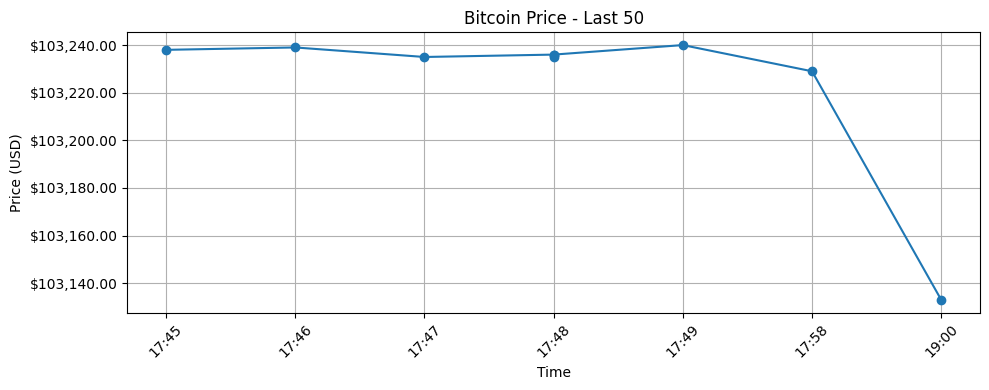

In [13]:
from django_orm_utils import fetch_and_store, get_last_n_prices
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Fetch new price and get recent data
fetch_and_store()
records = get_last_n_prices()

# Prepare data
timestamps = [r.timestamp.strftime("%H:%M") for r in records]
prices = [r.price_usd for r in records]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(timestamps, prices, marker='o')

plt.title("Bitcoin Price - Last 50")
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Price (USD)")

# Disable scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.2f}"))

plt.grid(True)
plt.tight_layout()
plt.show()